In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

## Drill: More clusters?

Your task is to take the $k$-means code here and see what happens when you change the value of $k$.  What solution, if any, do you find most compelling? Does complexity start to become an issue with this data set? Play around a bit and write up your findings and your process to share with your mentor.  Keep in mind that it may be possible to have a solution with more than two clusters that is still better at tracking the real binary outcome – two of those clusters may map to "heart disease" while the other maps to "no heart disease," for example.

In [31]:
df = pd.read_csv("cleveland.csv", header=None, error_bad_lines=False)
df.iloc[:, 13].unique()

array([0, 2, 1, 3, 4])

In [50]:
df = pd.read_csv("cleveland.csv", header=None, error_bad_lines=False)

# Define the features and the outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

## Try Everything
The task is to vary k and see what improves the result. I'll just try every combonation of k and number of principal components and see which one yields the smalles "error" when we assign each cluster to its 'best-fit' label.

In [82]:
X_norm = normalize(X)
result = pd.DataFrame(columns=['k', 'n_components', 'err'], index=[])
for n in range(1, 13):
    for k in range(1, 6):
        next_row = pd.DataFrame(columns=result.columns, index=[len(result)])
        next_row['k'] = k
        next_row['n_components'] = n
        
        X_pca = PCA(n).fit_transform(X_norm)
        y_pred = KMeans(n_clusters=k, random_state=42).fit_predict(X_pca)
        tab = pd.crosstab(y_pred, y)
        tab['err'] = tab[[0, 1]].min(axis=1)
        err = tab.err.sum()/len(df)
        next_row['err'] = err
        result = pd.concat([result, next_row], axis=0)
        
result.loc[result.err.sort_values().index].head(8)

,k,n_components,err
50,6,6,0.323432
41,6,5,0.323432
71,9,8,0.323432
59,6,7,0.323432
77,6,9,0.323432
12,4,2,0.323432
68,6,8,0.323432
104,6,12,0.326733


## Result
For k<10, the most compelling "best" combination is where k=4 and n_components = 2. I like this one because I like simple. Let's see what this looks like:

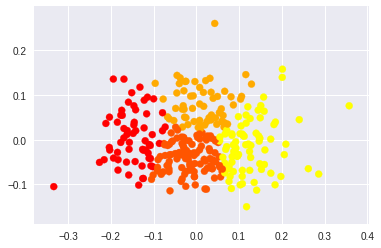

Comparing k-means clusters against the data:
col_0   0   1  err
row_0             
0      40  21   21
1      37  67   37
2      42  20   20
3      20  56   20
error rate:  32.34 %


In [89]:

X_pca = PCA(2).fit_transform(X_norm)
y_pred = KMeans(n_clusters=4, random_state=42).fit_predict(X_pca)

#Plot the solution.

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='autumn')
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
tab = pd.crosstab(y_pred, y)
tab['err'] = tab[[0, 1]].min(axis=1)
acc = tab.err.sum()/len(df)
print(tab)
print('error rate: ', str(100*acc)[:5], '%')

## Can we get any farther?
Now I'll vary k a lot. Up to a rediculous number like 100. We'll see if we can improve our error rate any further:

In [87]:
X_norm = normalize(X)
result = pd.DataFrame(columns=['k', 'n_components', 'err'], index=[])
for n in range(1, 13):
    for k in range(1, 100):
        next_row = pd.DataFrame(columns=result.columns, index=[len(result)])
        next_row['k'] = k
        next_row['n_components'] = n
        
        X_pca = PCA(n).fit_transform(X_norm)
        y_pred = KMeans(n_clusters=k, random_state=42).fit_predict(X_pca)
        tab = pd.crosstab(y_pred, y)
        tab['err'] = tab[[0, 1]].min(axis=1)
        err = tab.err.sum()/len(df)
        next_row['err'] = err
        result = pd.concat([result, next_row], axis=0)
        
result.loc[result.err.sort_values().index].head(8)

,k,n_components,err
880,89,9,0.198020
591,97,6,0.204620
689,96,7,0.204620
587,93,6,0.207921
791,99,8,0.211221
590,96,6,0.211221
1181,93,12,0.211221
981,91,10,0.211221


## Result
We are able to improve on our error rate quite a bit, but at the cost of complexity. Our best result is with 89 clusters and 9 principal components, so it's not simple by any means. Importantly, the mean cluster size here is 89/303 ~ 4 samples/cluster. This is a strong sign of "overfitting." If we look at the plot, there's really no clear pattern going on.

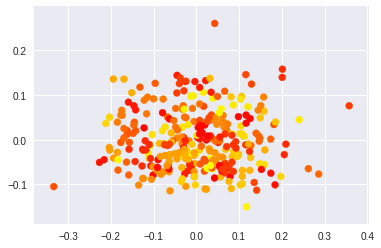

Comparing k-means clusters against the data:
col_0  0  1  err
row_0           
0      1  3    1
1      0  1    0
2      4  5    4
3      1  3    1
4      4  2    2
5      1  1    1
6      0  3    0
7      1  1    1
8      2  1    1
9      1  0    0
10     1  3    1
11     1  4    1
12     2  4    2
13     2  2    2
14     0  2    0
15     6  3    3
16     2  0    0
17     0  3    0
18     1  4    1
19     0  8    0
20     0  1    0
21     4  2    2
22     4  0    0
23     1  1    1
24     2  0    0
25     5  1    1
26     1  0    0
27     0  1    0
28     0  1    0
29     0  5    0
...   .. ..  ...
59     2  0    0
60     1  1    1
61     2  4    2
62     0  3    0
63     1  2    1
64     1  3    1
65     0  1    0
66     0  5    0
67     3  0    0
68     1  1    1
69     1  2    1
70     0  2    0
71     2  0    0
72     2  2    2
73     2  0    0
74     0  1    0
75     3  3    3
76     1  1    1
77     3  0    0
78     3  0    0
79     0  3    0
80     3  0    0
81     0  1    0
82 

In [88]:
X_pca = PCA(9).fit_transform(X_norm)
y_pred = KMeans(n_clusters=89, random_state=42).fit_predict(X_pca)

#Plot the solution.

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='autumn')
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
tab = pd.crosstab(y_pred, y)
tab['err'] = tab[[0, 1]].min(axis=1)
acc = tab.err.sum()/len(df)
print(tab)
print('error rate: ', str(100*acc)[:5], '%')

We can see that we gain very little descriptive or modeling power by increasing k so much, even though it is more accurate this way. 